In [1]:
import numpy as np
from random import randint, random
import matplotlib.pyplot as plt

# 1.Random NUmber Generation

In [71]:
def pseudo_random_number(seed = randint(0,100) , size = 1 , multiplicant = 788 , mod = 2**10-1):
    x = (seed * multiplicant + 4578)% mod
    batch = [x,]
    if size == 1 :
        return x
    else:
        for i in range(1,size):
            x= (x*multiplicant+4578)%mod
            batch.append(x)
        return batch

In [72]:
def random_number_with_limit(size = 1,seed = randint(0,100),lower_limit = 0, higher_limit = 9):
    random_list = pseudo_random_number(size = size,seed = seed)
    old_range = max(random_list)-min(random_list)
    new_range = higher_limit - lower_limit
    new_values=[]
    for i in range(size):
        new_val = int((((random_list[i]- min(random_list))*new_range)/old_range)+ lower_limit)
        new_values.append(new_val)
    return new_values
    
    

In [73]:
random_number_with_limit(size = 10,seed= 100,lower_limit = 100, higher_limit = 1000)

[562, 217, 325, 1000, 209, 156, 100, 996, 924, 208]

# 2.Coin Tosss

In [74]:
def coinToss(noOfTosses,times):
    random_variable = np.random.rand(noOfTosses,times)
    y= (random_variable<0.5)
    z= sum(map(lambda i:i == True , y))
    probability= z/noOfTosses
    return sum(probability)/times


In [75]:
print('Probability of head = ',coinToss(1000000,20))

Probability of head =  0.4999190500000001


### Self

In [14]:
def coinToss_self(sample):
    rand= random_number_with_limit(size = sample,lower_limit = 0, higher_limit = 9)
    rand = np.array(rand)
    y= (rand<5)
    z= sum(map(lambda i:i == True , y))
    probability= z/sample
    print(probability)

In [15]:
coinToss_self(10000)

0.5333


# 3.Estimation of value of pie

In [2]:
def val_pie(sample_points):
    x= np.random.rand(sample_points)
    y= np.random.rand(sample_points)
    circle_point_count = sum([1 for i in range (sample_points) if ((x[i]**2+y[i]**2)<=1) ])
    square_point_count = sample_points
    return (4*(circle_point_count/square_point_count))

In [3]:
print('Entimated value of PIE = ',val_pie(1000000))

Entimated value of PIE =  3.14258


In [7]:
points =1500

In [8]:
x= np.random.rand(points)
y= np.random.rand(points)

In [ ]:
for i in range(points):
    if x[i]**2+y[i]**2<=1:
        plt.scatter(x[i],y[i],color = 'red')
        plt.scatter(-x[i],y[i],color = 'red')
        plt.scatter(x[i],-y[i],color = 'red')
        plt.scatter(-x[i],-y[i],color = 'red')
    else:
        plt.scatter(x[i],y[i],color = 'blue')
        plt.scatter(-x[i],y[i],color = 'blue')
        plt.scatter(x[i],-y[i],color = 'blue')
        plt.scatter(-x[i],-y[i],color = 'blue')
plt.show()

# 4.Random Number test

### Kolmogorov-Smirnov Goodness of Fit(BY SELF)

In [21]:
def KS_test_self_random():
    size = 41
    random_values = random_number_with_limit(size = size,lower_limit = 0, higher_limit = 1)
    random_values.sort()
    dPlus = [((i/size)-random_values[i-1]) for i in range(1,size+1)]
    dMinus = [(random_values[i-1]-((i-1)/size)) for i in range (1,size+1)]
    max_dPlus = max(dPlus)
    max_dMinus = max(dMinus)
    D_calculated = max(max_dMinus,max_dPlus)
    print("Dcalculated=",D_calculated)
    D_critical = 0.210 #from critical table for 40 degree of freedom and aplha 0.05
    print("D_critical =",D_critical)
    if(D_calculated<=D_critical):
        print("Uniformaly Distributed")
    else:
        print("Not Uniformly Distributed")

### Kolmogorov-Smirnov Goodness of Fit(IMPORTED)

In [22]:
def KS_test_imported_random():
    size = 41
    random_values =[random() for i in range(size)]
    random_values.sort()
    dPlus = [((i/size)-random_values[i-1]) for i in range(1,size+1)]
    dMinus = [(random_values[i-1]-((i-1)/size)) for i in range (1,size+1)]
    max_dPlus = max(dPlus)
    max_dMinus = max(dMinus)
    D_calculated = max(max_dMinus,max_dPlus)
    print("Dcalculated=",D_calculated)
    D_critical = 0.210 #from critical table for 40 degree of freedom and aplha 0.05
    print("D_critical =",D_critical)
    if(D_calculated<=D_critical):
        print("Uniformaly Distributed")
    else:
        print("Not Uniformly Distributed")

In [23]:
KS_test_imported_random()
KS_test_self_random()

Dcalculated= 0.11527946593326033
D_critical = 0.21
Uniformaly Distributed
Dcalculated= 0.9512195121951219
D_critical = 0.21
Not Uniformly Distributed


### Chi Square Goodness of fit SELF

In [40]:
def chi_square_test_self(size):
    random_values = random_number_with_limit(size =size,seed = 20,lower_limit = 0, higher_limit = 9)
    O = [random_values.count(i) for i in range(10)]
    E = size / 10
    xSquare_Calculated = sum([((O[i]-E)**2)/E for i in range (10)])
    print("xSquare_Calculated = ",xSquare_Calculated)
    xSquare_critical = 16.92 # for degree of freedom = 9 and alpha =0.05
    print("xSquare_critical = ",xSquare_critical )
    if(xSquare_Calculated<=xSquare_critical):
        print("Uniformaly Distributed")
    else:
        print("Not Uniformly Distributed")

### Chi Square Goodness of fit IMPORTED

In [41]:
def chi_square_test_imported(size):
    random_values = [randint(0,9) for i in range (size)]
    O = [random_values.count(i) for i in range(10)]
    E = size / 10
    xSquare_Calculated = sum([((O[i]-E)**2)/E for i in range (10)])
    print("xSquare_Calculated = ",xSquare_Calculated)
    xSquare_critical = 16.92 # for degree of freedom = 9 and alpha =0.05
    print("xSquare_critical = ",xSquare_critical )
    if(xSquare_Calculated<=xSquare_critical):
        print("Uniformaly Distributed")
    else:
        print("Not Uniformly Distributed")

In [42]:
chi_square_test_self(51)

xSquare_Calculated =  19.3921568627451
xSquare_critical =  16.92
Not Uniformly Distributed


In [43]:
chi_square_test_imported(51)

xSquare_Calculated =  9.588235294117647
xSquare_critical =  16.92
Uniformaly Distributed


# 5.Exponential Random Variate

In [78]:
def exponential_random_variate_imported(mean,size):
    random_number = [random() for i in range(size)]
#     print(random_number)
    random_variate = [(-1/mean)*np.log(1 - random_number[i]) for i in range(size)]
    sns.distplot(random_variate, hist=True)
    plt.show()
    return random_variate

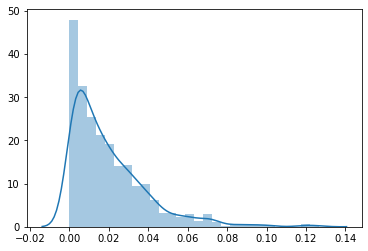

[0.011637687026156578,
 0.013879976592967882,
 0.014401419349775076,
 5.8318233008648996e-05,
 0.028479974335013987,
 0.02104183218495132,
 0.003175074092776841,
 0.0009842883643682763,
 0.00869173320842772,
 0.010231411691540663,
 0.002885750315561196,
 0.03156653153958058,
 0.015335082551377189,
 0.012199298117469988,
 0.0010387502074157519,
 0.0034093668165560073,
 0.027204197499564337,
 0.026768695189693575,
 0.007217367635117413,
 0.01180395942279592,
 0.006113512725072694,
 0.008755503199879206,
 0.025938880803118104,
 0.01293387009264656,
 0.015790494670010306,
 0.012814773964665679,
 0.04524345940201345,
 0.03699095539230469,
 0.02192811681173745,
 0.03698403526775618,
 0.023881788219431512,
 0.020524026284665906,
 0.01616551382981914,
 0.002623772064021411,
 0.0040475177280638016,
 0.004102110184989811,
 0.040321283239036054,
 0.000608256237751208,
 0.0007710061882946807,
 0.045571049639370184,
 7.889236750729774e-07,
 0.01789061944563806,
 0.010476292186459379,
 0.01416494875

In [79]:
exponential_random_variate_imported(50,1000)